# Data Exploration
##### Dataset at https://www.kaggle.com/datasnaek/mbti-type/downloads/mbti-myers-briggs-personality-type-dataset.zip

In [1]:
import pandas as pd
df = pd.read_csv("./data/mbti_1.csv")
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'I am through with always being a listening ea...
freq,1832,1


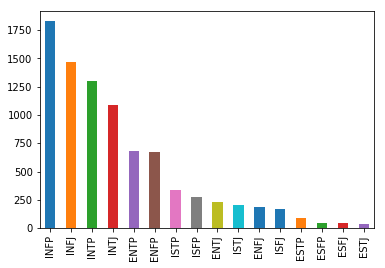

In [2]:
%matplotlib inline
df.type.value_counts().plot(kind="bar")

In [3]:
#I'm sure there's a more efficient way to do this in pandas
#this just inserts commas between the letters so I can use
#pandas' built-in split function to make columns
def lazysplit(string):
    return ",".join(list(string))

#Meyers & Briggs foundation calls these individual letters preferences
preferences = df.type.map(lazysplit).str.split(",", expand=True)
preferences.columns = ["favorite world", "information", "decisions", "structure"]
preferences.columns = ["fav", "inf", "dec", "str"]
preferences.describe()

,fav,inf,dec,str
count,8675,8675,8675,8675
unique,2,2,2,2
top,I,N,F,P
freq,6676,7478,4694,5241


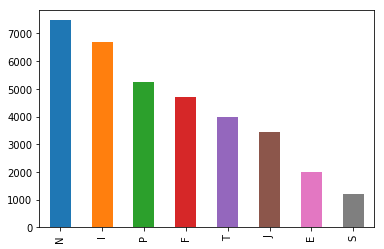

In [4]:
#Let's plot these preferences individually
melted = pd.melt(preferences)
melted.value.value_counts().plot(kind="bar")

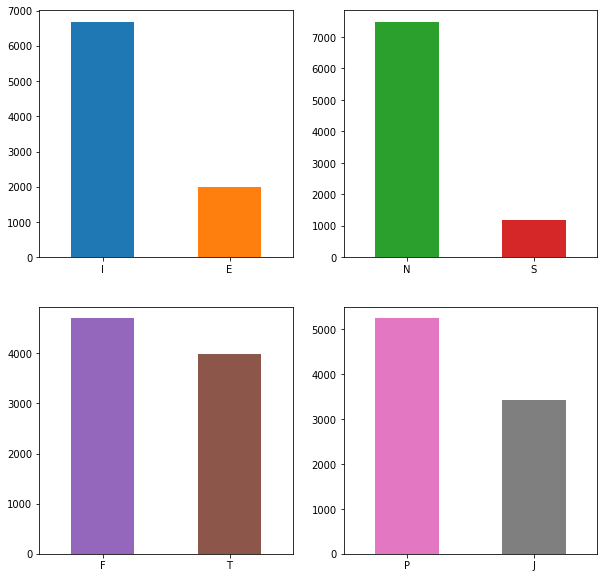

In [5]:
#That's really unhelpful. Let's plot them in a pairwise manner
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2,2)
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf'] #thanks matplotlib

for i, pref in enumerate(preferences.columns):
    preferences[pref].value_counts().plot(
        kind="bar", 
        ax=axes[i // 2][i % 2],
        figsize=(10,10),
        rot=0,
        color = new_colors[i*2:]
    )

In [6]:
#put this all back together
dataset = pd.concat([preferences, df.posts], axis=1)
dataset.describe()

,fav,inf,dec,str,posts
count,8675,8675,8675,8675,8675
unique,2,2,2,2,8675
top,I,N,F,P,'I am through with always being a listening ea...
freq,6676,7478,4694,5241,1


In [7]:
#and write it back to a file
dataset.to_csv("./data/modified_mbti_1.csv")